# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [1]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [1]:
import numpy as np
import math

In [2]:
x_input = np.random.rand(3,5,5) 
weights = np.random.normal(size=(3,3,2,2))
bias = np.random.normal(size = (3,1))

In [ ]:
def crop2d(channel, filter_row_num, filter_col_num, rows, columns, stride):
    cropped = []
    for row in range(rows):
        for column in range(columns):
            cropped_array = channel[row * stride : row * stride + filter_row_num, column * stride : column * stride + filter_col_num]
            cropped.append(cropped_array)
    return cropped

In [4]:
def conv2d(image,weight,stride):
    conv = []
    filter_row, filter_column = weight.shape  
    image_row, image_column = image.shape
    row = math.ceil((image_row - filter_row)/stride + 1)
    column = math.ceil((image_column - filter_column)/stride +1)
    conv_array = np.empty((row,column))
    cropped_array = crop2d(image,filter_row,filter_column,row,column,stride)
    for cropped_array1 in cropped_array:
        multiply_2d = np.sum(cropped_array1 * weight)
        conv.append(multiply_2d)
    conv_array = np.array(conv).reshape(row,column)
    return conv_array



In [ ]:
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
return new_image

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [2]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

### Question 2

In [3]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [5]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

### Display the image

In [6]:
image = cv2.imread('beer.png') # Please load different Images to explore 

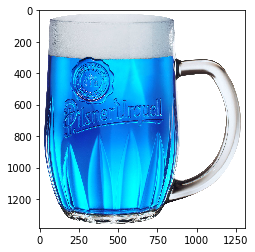

In [7]:
plt.imshow(image)

In [8]:
# what does the image look like?
image.shape

(1384, 1310, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - 

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [9]:
model = Sequential()
model.add(Convolution2D(3,    # number of ____________
                        (3,    # ___________ dimension of kernel 
                        3),    # ___________ dimension of kernel
                        input_shape=image.shape))

In [10]:
image_batch = np.expand_dims(image,axis=0)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer -

In [11]:
image_batch.shape

(1, 1384, 1310, 3)

In [12]:
conv_image = model.predict(image_batch)

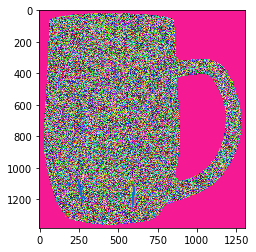

In [13]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [ ]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

In [ ]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

## 10x10 Kernel Convimage

In [ ]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - 

### Question 2

### What is the reason behing this difference ?

Answer -

# Play around with code below, to enhance your understading

## Another image Vis 

In [ ]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [ ]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

In [ ]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer

## Increase the kernal size

In [ ]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [ ]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



In [ ]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

In [ ]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)